## Ivestigating : PCA

In [1]:
### in this file I am trying to see the best way to appraoch the pca
### because our goal using pca is always to reduce the dimensionality in a way that
### we get the 2-3 features covering most of the variance for the unsupervised ML

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data

In [2]:
df = pd.read_csv('../data/fraud-detection-cleaned.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label,transaction_type_ATM Withdrawal,...,merchant_Groceries,merchant_Restaurants,merchant_Travel,auth_method_Biometric,auth_method_OTP,auth_method_PIN,card_type_Amex,card_type_Discover,card_type_Visa,Transaction_Amount_boxcox
0,93213.17,7,437.63,3,65,883.17,0.8494,0,0,0,...,0,0,1,1,0,0,1,0,0,5.917374
1,75725.25,13,478.76,4,186,2203.36,0.0959,0,1,0,...,0,0,0,0,0,0,0,0,0,0.860767
2,1588.96,14,50.01,4,226,1909.29,0.8400,0,1,0,...,0,1,0,1,0,0,0,0,1,5.205741
3,76807.20,8,182.48,4,76,1311.86,0.7935,0,1,1,...,0,0,0,0,1,0,0,0,1,11.399354
4,92354.66,14,328.69,4,140,966.98,0.3819,1,1,0,...,0,0,0,0,0,0,0,0,0,5.373048


In [3]:
corr = df.corr()['Fraud_Label'].sort_values(ascending = False)
print(corr)

Fraud_Label                        1.000000
Failed_Transaction_Count_7d        0.509871
Risk_Score                         0.385810
merchant_Restaurants               0.005285
auth_method_OTP                    0.004696
card_type_Discover                 0.004424
transaction_type_ATM Withdrawal    0.004392
location_New York                  0.003750
location_Tokyo                     0.003693
card_type_Amex                     0.003001
merchant_Travel                    0.001796
Avg_Transaction_Amount_7d          0.000703
Transaction_Amount_boxcox          0.000687
Is_Weekend                         0.000064
location_Sydney                    0.000056
transaction_type_Online           -0.000053
Transaction_Distance              -0.000116
merchant_Groceries                -0.000268
auth_method_Biometric             -0.000789
merchant_Electronics              -0.002207
device_type_Laptop                -0.002742
Card_Age                          -0.003120
Account_Balance                 

### taking the 4 most correlated columns only

In [9]:
df_sample = df[['Failed_Transaction_Count_7d', 'Risk_Score', 'merchant_Restaurants', 'auth_method_OTP']]

In [10]:
df_sample

,Failed_Transaction_Count_7d,Risk_Score,merchant_Restaurants,auth_method_OTP
0,3,0.8494,0,0
1,4,0.0959,0,0
2,4,0.8400,1,0
3,4,0.7935,0,1
4,4,0.3819,0,0
...,...,...,...,...
49995,3,0.1493,0,0
49996,4,0.3653,0,0
49997,2,0.5195,0,0
49998,4,0.7063,0,0


### using the pca there and see

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [18]:
df_sample_scaled = scaler.fit_transform(df_sample)

In [19]:
df_sample_scaled

array([[ 0.70458117,  1.20875345, -0.49924989, -0.57322409],
       [ 1.41166542, -1.40964579, -0.49924989, -0.57322409],
       [ 1.41166542,  1.17608862,  2.00300496, -0.57322409],
       ...,
       [-0.00250308,  0.06235676, -0.49924989, -0.57322409],
       [ 1.41166542,  0.71148347, -0.49924989, -0.57322409],
       [-0.70958733,  1.36304267,  2.00300496,  1.74451846]])

In [20]:
pca = PCA()

In [22]:
df_pca = pca.fit_transform(df_sample_scaled)

In [24]:
pca.explained_variance_ratio_

array([0.25142174, 0.25019017, 0.24971693, 0.24867116])

### taking only two features

In [25]:
df_sample = df[['Failed_Transaction_Count_7d', 'Risk_Score']]

In [26]:
df_sample

,Failed_Transaction_Count_7d,Risk_Score
0,3,0.8494
1,4,0.0959
2,4,0.8400
3,4,0.7935
4,4,0.3819
...,...,...
49995,3,0.1493
49996,4,0.3653
49997,2,0.5195
49998,4,0.7063


In [27]:
df_sample_scaled = scaler.fit_transform(df_sample)
df_pca = pca.fit_transform(df_sample_scaled)

In [28]:
print(pca.explained_variance_ratio_)

[0.50040725 0.49959275]


### applying the clustering over there

In [29]:
wcss = []
for k in range(1, 12) : 
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

In [30]:
print(wcss)

[100000.00000000012, 62591.43883899188, 39439.60651720398, 24856.585152762393, 21105.44273326441, 17634.32313976848, 14735.794830741683, 12236.097566974515, 10536.569864776502, 9876.803183408078, 9407.480929748746]


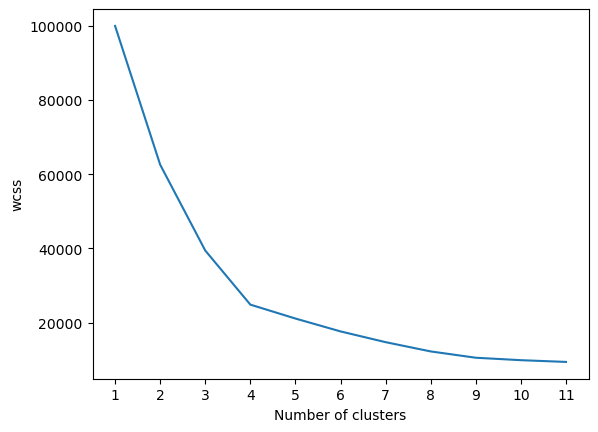

In [31]:
plt.plot(range(1, 12), wcss)
plt.xticks(range(1, 12))
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

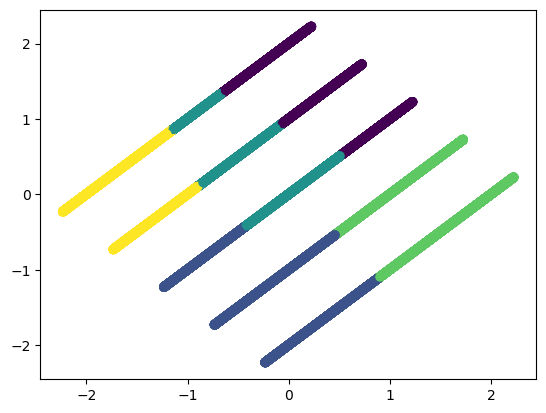

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_label = kmeans.fit_predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = y_label)

### -------------------------taking only the numerical features-------------------------

In [35]:
df_numerical = pd.read_csv('../data/numerical-only.csv')
df_numerical.drop('Unnamed: 0', axis = 1, inplace = True)
df_numerical.head()

,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox
0,93213.17,7,437.63,3,65,883.17,0.8494,0,5.917374
1,75725.25,13,478.76,4,186,2203.36,0.0959,0,0.860767
2,1588.96,14,50.01,4,226,1909.29,0.8400,0,5.205741
3,76807.20,8,182.48,4,76,1311.86,0.7935,0,11.399354
4,92354.66,14,328.69,4,140,966.98,0.3819,1,5.373048


In [36]:
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_pca = pca.fit_transform(df_numerical_scaled)

In [37]:
df_numerical_pca

array([[ 1.36050014e+00,  1.67565843e-01, -1.28992142e+00, ...,
         1.39974855e+00, -9.45066768e-01, -5.22532705e-01],
       [ 3.14230796e-01, -2.11794816e+00, -1.65690719e+00, ...,
         1.17415910e+00,  1.20035422e+00, -5.47446180e-02],
       [-6.39589700e-02,  4.62775087e-01,  8.09565838e-01, ...,
        -7.72902982e-01,  8.73441151e-01,  1.91140497e+00],
       ...,
       [ 1.89721684e-01,  1.51869894e+00,  1.46191671e-03, ...,
         6.13607861e-01,  7.59713123e-01, -7.85201726e-01],
       [-6.00881504e-01,  1.04173308e+00, -1.78949118e+00, ...,
         5.02062803e-01,  5.98576300e-01,  1.61894409e+00],
       [ 7.78833399e-01,  6.11027107e-01,  7.67748412e-01, ...,
         3.10948686e-01, -4.91410103e-01, -3.06485375e-01]])

In [38]:
print(pca.explained_variance_ratio_)

[0.11324201 0.1127438  0.11235813 0.11149063 0.11112221 0.11084629
 0.11028577 0.10971713 0.10819404]


In [47]:
pca = PCA(n_components = 4)

In [48]:
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_pca = pca.fit_transform(df_numerical_scaled)

In [49]:
wcss = []
for k in range(1, 12) : 
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df_numerical_pca)
    wcss.append(kmeans.inertia_)

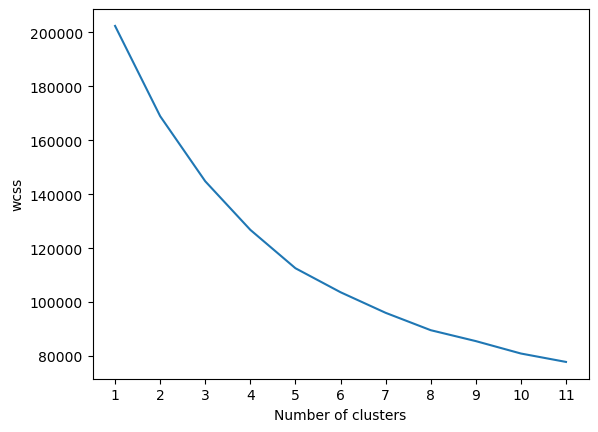

In [50]:
plt.plot(range(1, 12), wcss)
plt.xticks(range(1, 12))
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

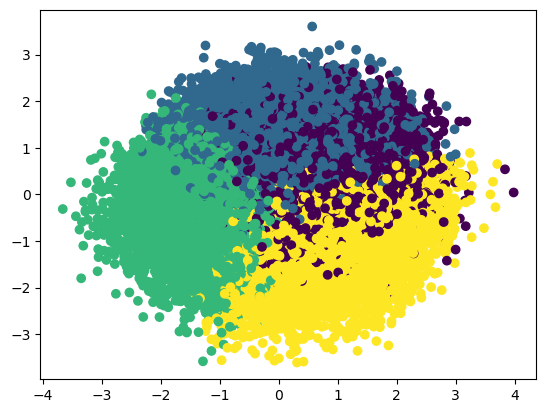

In [53]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_label = kmeans.fit_predict(df_numerical_pca)
plt.scatter(df_numerical_pca[:, 0], df_numerical_pca[:, 1], c = y_label)

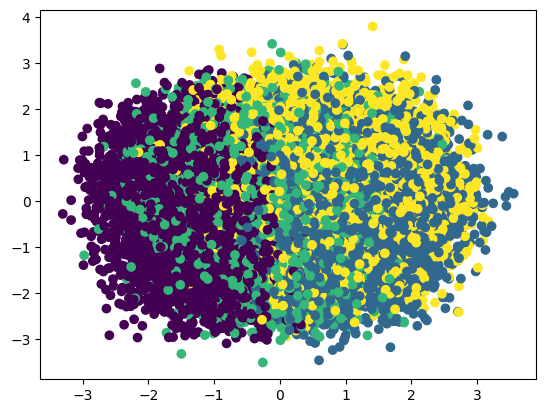

In [54]:
plt.scatter(df_numerical_pca[:, 2], df_numerical_pca[:, 3], c = y_label)

### -------------------conclusions------------------------

In [39]:
### even taking only the numerical features, the dataset gives a uniform variance relation
### the next steps will be doing the same problem with other algorithms like
### DB scan, hierarichal means clustering etc.